In [1]:
import pandas as pd
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer


C:\Users\HP\anaconda3\Anacondanew\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df=pd.read_csv(r"C:\Users\HP\Downloads\emotions (1).csv")
df

,text,label
0,ive enjoyed being able to slouch about relax a...,0
1,i dont know i feel so lost,0
2,i was beginning to feel quite disheartened,0
3,i can still lose the weight without feeling de...,0
4,im feeling a little like a damaged tree and th...,0
...,...,...
11995,i feel weird using his first name but the alte...,5
11996,i read them i feel pleasantly surprised that t...,5
11997,i feel a strange sense of guilt about it all,5
11998,i let people know how i m actually feeling and...,5


In [3]:
df["label"].unique()

array([0, 1, 2, 3, 4, 5], dtype=int64)

<Axes: xlabel='label'>

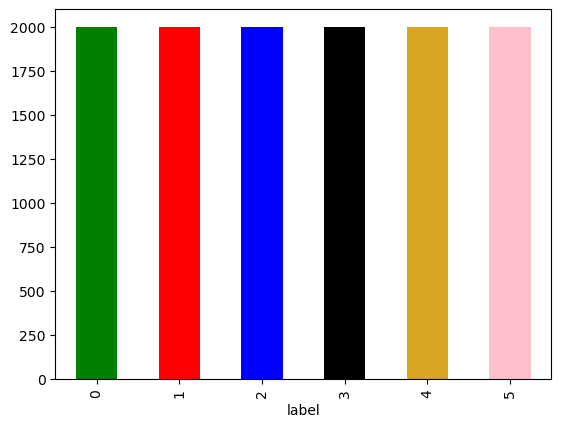

In [4]:
df["label"].value_counts().plot(kind='bar',color=["green","red","blue","black","Goldenrod","pink"])

### Splitting data into input and output

In [5]:
x = df["text"]
y= df["label"]

### Bag of words  ((vectorisation)

In [6]:
from sklearn.feature_extraction.text import CountVectorizer

In [7]:
bow = CountVectorizer(stop_words='english')

In [8]:
bow.fit(x)
X=bow.transform(x).toarray()
Y=y

### data spliiting for model 80/20

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=23)

In [11]:
X_train.shape

(9600, 12870)

In [12]:
Y_train.shape

(9600,)

### Apply alogorithmns

### knn

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [14]:
knn = KNeighborsClassifier()
knn.fit(X_train,Y_train)
Y_pred = knn.predict(X_test)
accuracy_score(Y_test,Y_pred)

0.5375

### Naive bayes

In [15]:
from sklearn.naive_bayes import MultinomialNB

In [16]:
nb = MultinomialNB()
nb.fit(X_train,Y_train)
Y_pred = nb.predict(X_test)
accuracy_score(Y_test,Y_pred)

0.8116666666666666

### SVC

In [17]:
from sklearn.svm import SVC

sv = SVC()
sv.fit(X_train,Y_train)
Y_pred = sv.predict(X_test)
accuracy_score(Y_test,Y_pred)

### Decesion tree

In [18]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train,Y_train)
Y_pred = dt.predict(X_test)
accuracy_score(Y_test,Y_pred)

### Deployment

In [19]:
message = input("Enter the text:")
Data = bow.transform([message]).toarray()
nb.predict(Data)[0]

Enter the text:i would like to continue with the story but at this moment i am feeling a little rushed


3

In [21]:
message = input("Enter the Text :")
Data = bow.transform([message]).toarray()
Result=nb.predict(Data)[0]
Result


Enter the Text :i would like to continue with the story but at this moment i am feeling a little rushed


3

### pickling

In [22]:
import pickle

In [26]:
pickle.dump(nb,open("nb_emotion.pkl","wb"))

In [24]:
bow = CountVectorizer(stop_words='english')
bow.fit(df['text'])
pickle.dump(bow,open(r"C:\Users\HP\AI ELITE 20\bow_emotion.pkl","wb"))